# Polynomial Regression

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
np.random.seed(100)

In [56]:
ra= np.random.randn(50)*200

In [57]:
x=np.linspace(-10,10,50)
y=x**3+100+ra

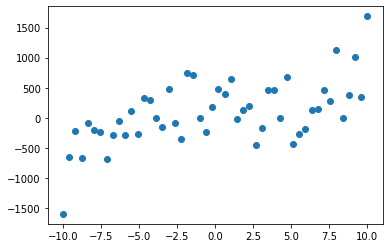

In [58]:
plt.plot(x,y+ra,'o')

In [59]:
df= pd.DataFrame({'x':x,'y':y})

In [60]:
df.head()

,x,y
0,-10.000000,-1249.953095
1,-9.591837,-713.944858
2,-9.183673,-443.942559
3,-8.775510,-626.285557
4,-8.367347,-289.554677


In [61]:
X= df['x'].values
y= df['y'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [63]:
pf= PolynomialFeatures(degree=4)
X_poly= pf.fit_transform(X_train.reshape(-1,1))

In [64]:
lm=LinearRegression()
lm.fit(X_poly,y_train)
y_hat= lm.predict(X_poly)

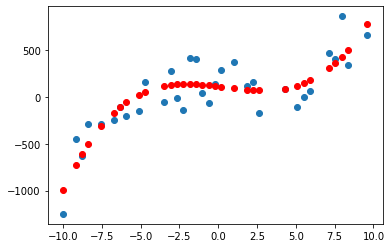

In [65]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_hat,'ro')

In [66]:
X_poly_test= pf.fit_transform(X_test.reshape(-1,1))
y_hat_test= lm.predict(X_poly_test)

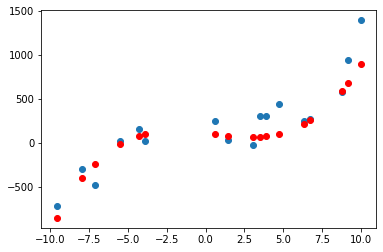

In [67]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_hat_test,'ro')

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE= np.sqrt(mean_squared_error(y_test,y_hat_test))
r2= r2_score(y_test,y_hat_test)
print(RMSE,'\n',r2)

199.58431401732813 
 0.8266245484168875


In [69]:
r2_train=[]
r2_test=[]
for i in range(1,11):
    
    pf= PolynomialFeatures(degree=i)
    X_poly= pf.fit_transform(X_train.reshape(-1,1))
    
    lm=LinearRegression()
    lm.fit(X_poly,y_train)
    
    y_hat= lm.predict(X_poly)
    
    X_poly_test= pf.fit_transform(X_test.reshape(-1,1))
    y_hat_test= lm.predict(X_poly_test)
    
    r2_train.append(r2_score(y_train,y_hat))
    r2_test.append(r2_score(y_test,y_hat_test))

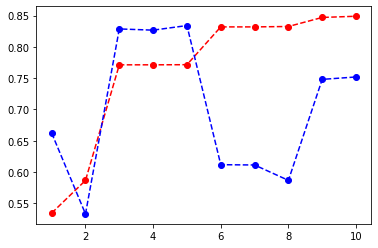

In [70]:
plt.plot(range(1,11),r2_train,'--ro')
plt.plot(range(1,11),r2_test,'--bo')

# Car Price IBM

In [139]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [180]:
from sklearn.preprocessing import PolynomialFeatures

In [181]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [182]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


In [183]:
Z_pr=pr.fit_transform(Z)

In [184]:
# 4 features
Z.shape

(201, 4)

In [185]:
# 15 features
Z_pr.shape

(201, 15)

In [186]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(Z_pr,df['price'])
y_hat= lm.predict(Z_pr)

In [187]:
from sklearn.metrics import r2_score

In [188]:
r2_score(y_hat,df['price'])

0.8184336594696859

In [189]:
lm.score(Z_pr, df['price'])

0.8463341969864728

### using Pipeline, spliting data into test and training set

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(Z, df['price'], test_size=0.33, random_state=42)

In [192]:
from sklearn.pipeline import Pipeline

In [193]:
pl= Pipeline([('pr',PolynomialFeatures(degree=2)),
              ('lm',LinearRegression())])

In [194]:
pl.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('pr',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [195]:
y_hat= pl.predict(X_test)

In [196]:
from sklearn.metrics import r2_score

In [197]:
r2_score(y_test,y_hat)

0.7776397627797533

#### Let's see if it works better by scaling

In [199]:
from sklearn.preprocessing import StandardScaler

In [202]:
pl= Pipeline([('scale',StandardScaler()),
              ('pr',PolynomialFeatures(degree=2,include_bias=False)),
              ('lm',LinearRegression())])

pl.fit(X_train,y_train)
y_hat= pl.predict(X_test)

r2_score(y_test,y_hat)

0.7776397627744183

In [203]:
def r2_vs_degree(degree):

    pl= Pipeline([('pr',PolynomialFeatures(degree=degree,include_bias=False)),
                  ('lm',LinearRegression())])

    pl.fit(X_train,y_train)
    y_hat= pl.predict(X_test)

    print(r2_score(y_test,y_hat))
    
    

In [210]:
for i in range(1,7):
    r2_vs_degree(i)

0.7758571181753636
0.7776397627741505
0.7687197444459761
-48.96119976551364
-96.01553115160429
-303.89855129247655


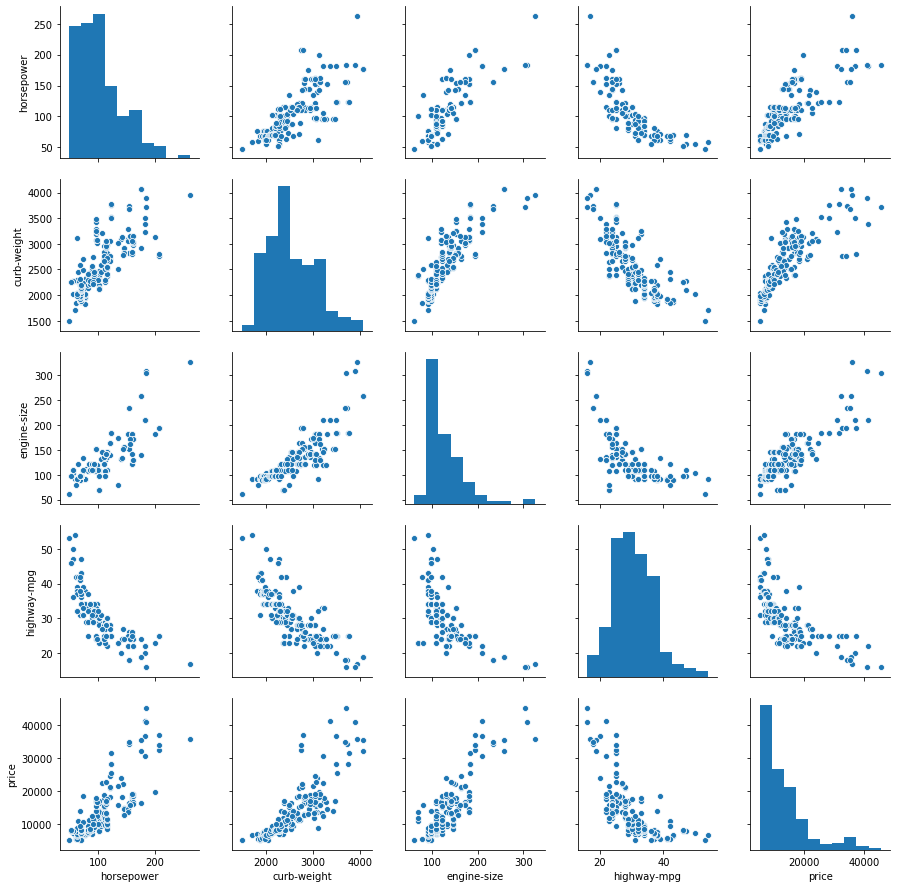

In [211]:
sns.pairplot(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','price']])

# Polynomial Regression in numpy

In [79]:
f= np.polyfit(x,y,3)

In [80]:
p= np.poly1d(f)

In [81]:
print(p)

       3          2
1.183 x - 0.8216 x - 16.79 x + 120.3


In [84]:
p(1)

103.91527057282848

In [85]:
p(0)

120.34276266679878

In [135]:
def PlotPolly(x, y, degree, x_name='x', y_name='y'):
    
    f = np.polyfit(x, y, degree)
    p = np.poly1d(f)
    
    x_new = np.linspace(x.min(), x.max(), 100)
    y_new = p(x_new)

    plt.figure(figsize=(10,6))
    plt.plot(x, y, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib')
    ax = plt.gca()
    ax.set_facecolor((0.9, 0.9, 0.9))
    fig = plt.gcf()
    plt.xlabel(x_name)
    plt.ylabel(y_name)

    plt.show()
    plt.close()

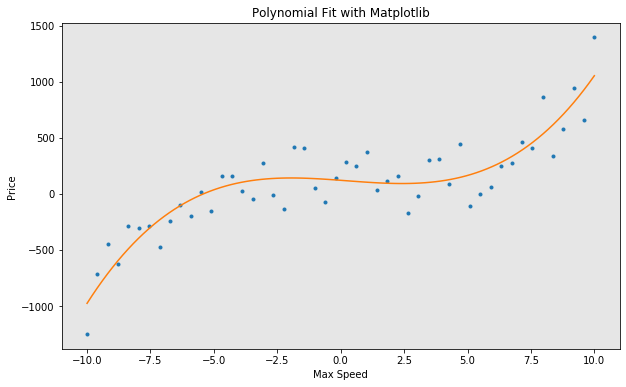

In [137]:
PlotPolly(x,y,3,x_name='Max Speed',y_name='Price')

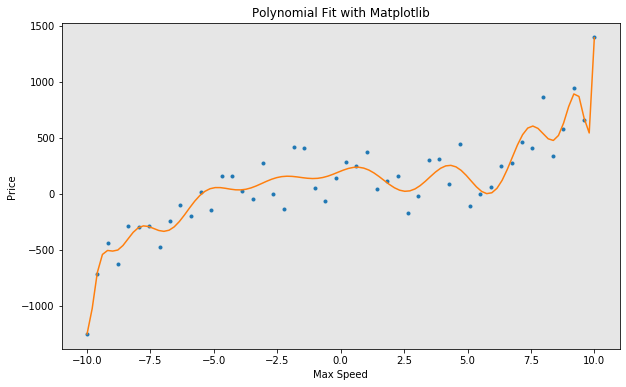

In [138]:
PlotPolly(x,y,20,x_name='Max Speed',y_name='Price')